In [137]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize
import json
import csv
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None) # to see the complete DF and not the truncated version

In [5]:
league_url ='https://fantasy.premierleague.com/api/leagues-classic/1771282/standings/'
r = requests.get(league_url).text
json_data = json.loads(r)
# print (json.dumps(json_data, indent=2))

In [6]:
#converting to DF

In [7]:
league_data = pd.DataFrame(json_data['standings']['results'])

In [8]:
#creating list of dataframes for each individual player 

In [121]:
all_dataframes = []
player_id = league_data['entry'].tolist()
all_name = iter(league_data["player_name"].tolist())
no_gw = 9 # total no. of GW for the league
total_transfer = []
bench_points = []
final_team_value= []

for team in player_id:

    team_url = 'https://fantasy.premierleague.com/api/entry/' + str(team) + '/history/' #inidividual address for each player
    p_id = requests.get(team_url).text
    teams_json_data = json.loads(p_id)
    #print(json.dumps(teams_json_data, indent =2))  #prints JSON for every player

    dataframe = pd.DataFrame(teams_json_data['current'], columns = ['event','event_transfers','points_on_bench','value'])  #create dataframes for each player       
    #dataframe = pd.DataFrame(row, columns = ["GW", "total_points"])

    #addressing for player with old accounts 
    if len(dataframe['event']) >= 20:
        dataframe =  dataframe.drop(dataframe[dataframe.event < 39].index)
        dataframe.iloc[0,1] = 0
        
    #getting total number of upto that GW
    t = dataframe['event_transfers'].sum(axis = 0, skipna = True)
    total_transfer.append(t)
    
    #getting total number points on bench upto that GW
    b = dataframe['points_on_bench'].sum(axis = 0, skipna = True)
    bench_points.append(b)
    
    #converting team value to decimalpoint value
    dataframe['value'] = dataframe['value'].div(10)
    v = dataframe.value.iat[-1]# taking the last value in the "value" column
    final_team_value.append(v)
    
    #renaming the coulumn            
    dataframe = dataframe.rename(columns = {"event": next(all_name)})
    dataframe = dataframe.reset_index(drop=True)
    all_dataframes.append(dataframe)

In [123]:
#converitng the "player_name" column in the "league_data" DF to a list 

In [124]:
all_name_list = league_data["player_name"].tolist()

In [125]:
#DFs for total transfers and points-on-bench and final bank value

In [177]:
all_name_list = league_data["player_name"].tolist()
total_transfers_df = pd.DataFrame({'Name': all_name_list,'Total Transfers': total_transfer})
total_pob_df = pd.DataFrame({'Name': all_name_list,'Total Points on Bench': bench_points})
final_bank_value = pd.DataFrame({'Name': all_name_list,'Final Team Value': final_team_value})

In [178]:
#Sorting the DFs in a descending order

In [233]:
total_transfers_df = total_transfers_df.sort_values(by='Total Transfers', ascending=False)
total_pob_df = total_pob_df.sort_values(by='Total Points on Bench', ascending=False)
final_bank_value = final_bank_value.sort_values(by='Final Team Value', ascending=False)

In [270]:
total_transfers_df

,Name,Total Transfers
7,Likhon Amin,13
9,Asif Bin Zaman,13
8,Abrar Hossain,12
4,Pial Rahman,11
10,Muntasir Azad,11
0,Mubtasim Fuad,10
11,Mahedur Rahman,10
12,Zabir Sami,10
6,Tauhid Sefo,9
1,Mahbube Rabbani,8


In [130]:
#plotiing total transfers

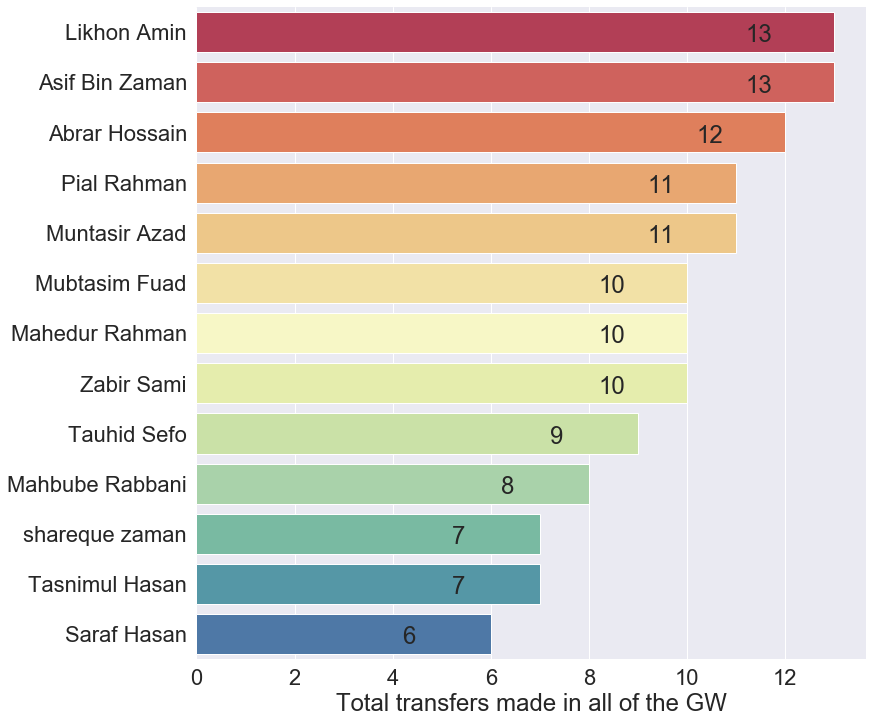

In [311]:
# Set the plot style and colour palette to use (remember dodgy spelling if you're from the UK!)
sns.set(style='dark') #darkgrid, whitegrid, dark, white, ticks
sns.set_color_codes('muted')
sns.set(font_scale=2)
 
# Initialize the matplotlib figure (f) and axes (ax), and set width and height of the plot
f, ax = plt.subplots(figsize=(12, 12))
ax.set_ylim(0,15)
# ax.set_xticks(range(9,103))
 
# Create the plot, choosing the variables for each axis, the data source and the colour (b = blue)
# show_values_on_bars(ax, h_v="v", space=0.4)
sns.barplot(x='Total Transfers', y='Name', data=total_transfers_df,palette='Spectral')
for p in ax.patches:
    width = p.get_width()
    ax.text(width -1.8  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:.0f}'.format(width),
            ha="left")

# Rename the axes, setting y axis label to be blank
ax.set(ylabel='', xlabel='Total transfers made in all of the GW')
 
# Remove the borders from the plot
sns.despine(left=True, bottom=True)

In [ ]:
#plottiing total points on bench

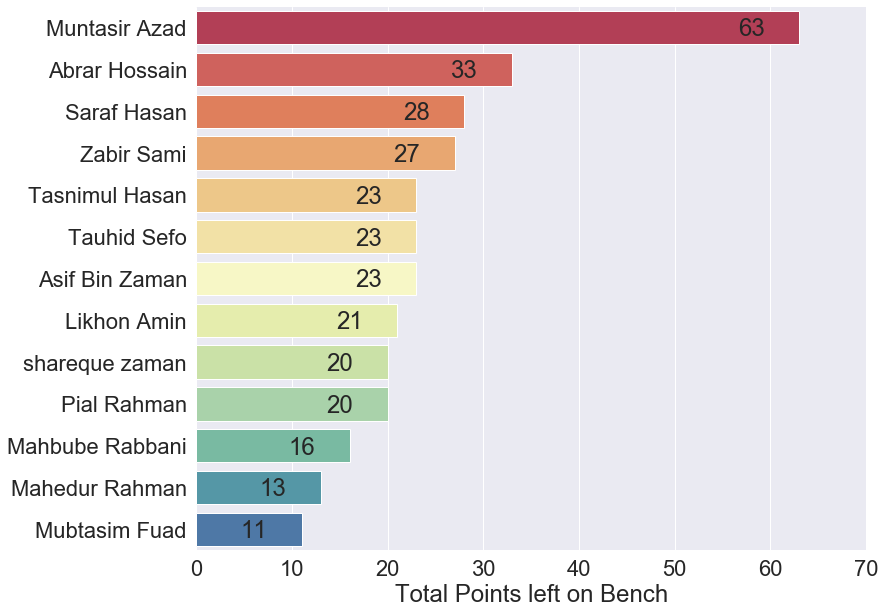

In [312]:
# Set the plot style and colour palette to use (remember dodgy spelling if you're from the UK!)
sns.set(style='whitegrid')
sns.set_color_codes('bright') 
sns.set(font_scale=2)

# Initialize the matplotlib figure (f) and axes (ax), and set width and height of the plot
f, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(0,70)
# ax.set_xticks(range(9,103))

# Create the plot, choosing the variables for each axis, the data source and the colour (b = blue)
# show_values_on_bars(ax, h_v="v", space=0.4)

sns.barplot(x='Total Points on Bench', y="Name", 
            data=total_pob_df.sort_values(by='Total Points on Bench', 
             ascending=False),palette='Spectral') #palette{deep, muted, pastel, dark, bright, colorblind}

for p in ax.patches:
    width = p.get_width()
    ax.text(width -6.4,
            p.get_y()+p.get_height()/2. + 0.2,
            '{:.0f}'.format(width),
            ha="left")

# Rename the axes, setting y axis label to be blank
ax.set(ylabel='', xlabel='Total Points left on Bench')

# Remove the borders from the plot
sns.despine(left=True, bottom=True)
    

In [ ]:
#plotting final team value

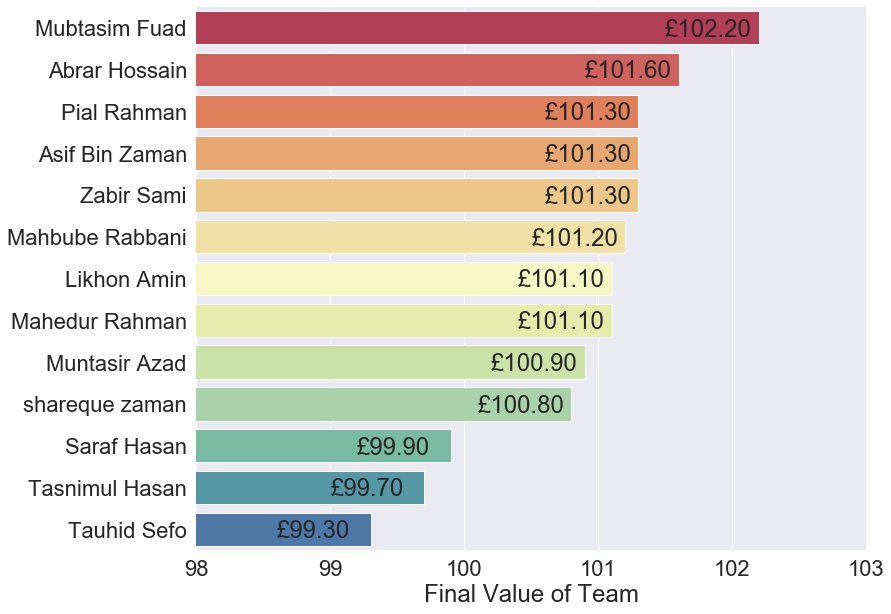

In [323]:
import unicodedata # to print pound sign


# Set the plot style and colour palette to use (remember dodgy spelling if you're from the UK!)
sns.set(style='whitegrid')
sns.set_color_codes('muted')
sns.set(font_scale=2)

 
# Initialize the matplotlib figure (f) and axes (ax), and set width and height of the plot
f, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(98,103)
# ax.set_xticks(range(9,103))
 
# Create the plot, choosing the variables for each axis, the data source and the colour (b = blue)
# show_values_on_bars(ax, h_v="v", space=0.4)
sns_t= sns.barplot(x='Final Team Value', y='Name', 
                   data=final_bank_value,
                   palette='Spectral')
for p in ax.patches:
    width = p.get_width()
    ax.text(width -0.7  ,
            p.get_y()+p.get_height()/2. + 0.2,
            '{}{:1.2f}'.format(unicodedata.lookup("Pound Sign"),width), ha="left")

# Rename the axes, setting y axis label to be blank
ax.set(ylabel='', xlabel='Final Value of Team')
 
# Remove the borders from the plot
sns.despine(left=True, bottom=True)